## Taxis de Rosario
#### __Análisis de los taxis de la ciudad de Rosario (Santa Fe) con datos extraídos del portal de Datos Abiertos de la ciudad.__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
evolicencias = pd.read_csv("evolucion_anual_de_licencias_taxis722.csv", sep=",")
evolicencias

,Periodo,Cantidad_Taxis
0,2016,3961
1,2017,3937
2,2018,3905
3,2019,3879
4,2020,3876
5,2021,3875
6,2022,3858


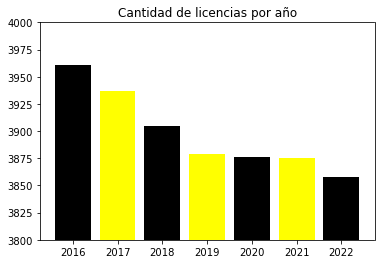

In [3]:
plt.bar(evolicencias.Periodo,evolicencias.Cantidad_Taxis, color=("black","yellow"))
plt.title("Cantidad de licencias por año")
plt.ylim(3800,4000)
plt.show()

In [4]:
anual = pd.read_csv("taxis_evol_anual.csv", sep=";")
anual

,Año,Viajes
0,2013,20073526
1,2014,26280770
2,2015,27408829
3,2016,28343120
4,2017,26005134
5,2018,28142090
6,2019,26754487
7,2020,18073158


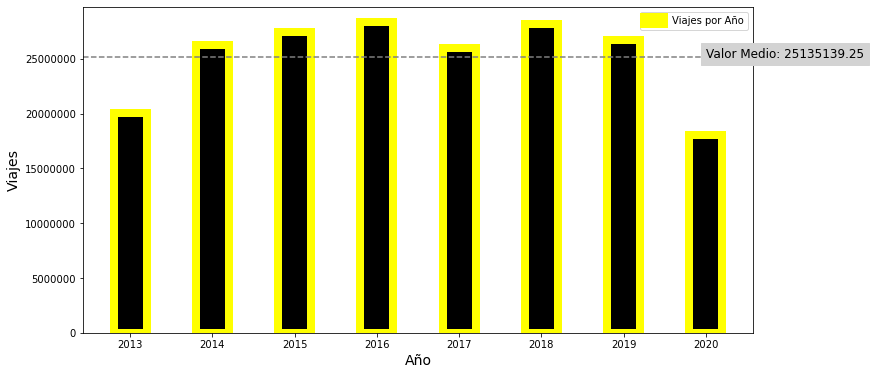

In [5]:
fig,ax = plt.subplots(figsize=(12,6))
plt.bar(anual.Año, anual.Viajes, label="Viajes por Año", width=0.4, color="black", ec="yellow", lw=8)

ax.set_xlabel('Año', fontsize=14) 
ax.set_ylabel('Viajes', fontsize=14)

media=anual.Viajes.mean()
plt.text(2020,media, "Valor Medio: "+str(media), backgroundcolor="lightgray", fontsize=12) 
plt.axhline(media, c="gray", ls="--")
plt.ticklabel_format(useOffset=False, style='plain') 

plt.legend()

In [6]:
choferes = pd.read_csv("choferes_taxis0722.csv", sep=",")
choferes

,NroLicencia,Apellido y Nombre,Genero
0,1,"AMICELLI, CRISTIAN HUGO",M
1,1,"QUIROGA, SERGIO FERNANDO",M
2,1,"RIEDEL, OSCAR CEFERINO",M
3,2,"ORAZI, CARLOS ALBERTO",M
4,2,"FALABELLA, EZEQUIEL NICOLAS",M
...,...,...,...
13791,4083,"PEDEMONTE, ADRIAN ALBERTO",M
13792,4083,"ALVAREZ, CRISTIAN FABIAN",M
13793,4079,"ALMADA, SEBASTIAN ALBERTO",M
13794,4079,"LUCERO, JORGE ALFREDO",M


In [7]:
genero = choferes.groupby(choferes.Genero).count()
genero

,NroLicencia,Apellido y Nombre
Genero,,
F,885,885
M,12911,12911


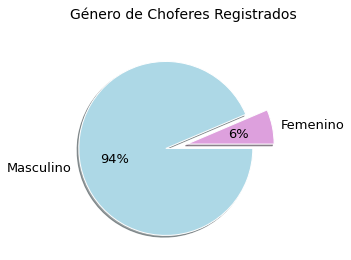

In [8]:
fig1, ax1 = plt.subplots(figsize=(4,4))
fig1.suptitle("Género de Choferes Registrados", fontsize=14)
ax1.pie(genero.NroLicencia, shadow=True, autopct="%1.0f%%", labels=["Femenino","Masculino"], colors=["plum","lightblue"],
        wedgeprops={"linewidth":1, "edgecolor":"white"},textprops={"fontsize":13}, explode=[0,0.25])

plt.show()

In [9]:
viajes = pd.read_table("evolucion_mensual_taxis_0.txt", sep=",")
viajes

,año,mes,Total_de_Viajes
0,2013,enero,1363509
1,2013,febrero,1315265
2,2013,marzo,1055360
3,2013,abril,1410829
4,2013,mayo,1227867
...,...,...,...
102,2021,julio,2104527
103,2021,agosto,2011202
104,2021,septiembre,2142839
105,2021,octubre,2209860


In [10]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   año              107 non-null    int64 
 1   mes              107 non-null    object
 2   Total_de_Viajes  107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


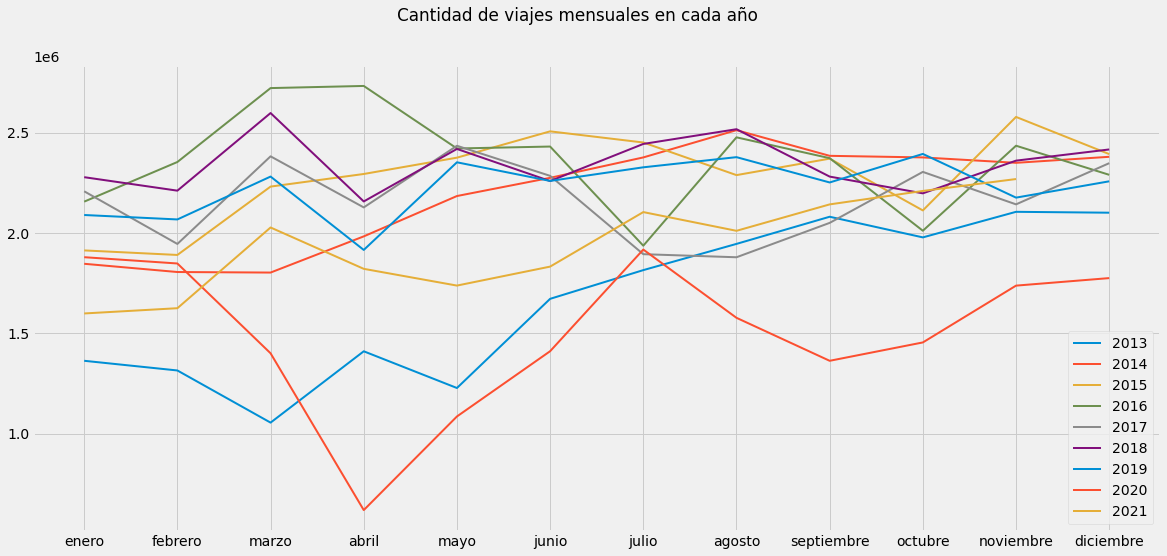

In [11]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(18,8))
fig.suptitle("Cantidad de viajes mensuales en cada año")

for año in viajes.año[viajes.mes=="enero"]:
    plt.plot(viajes.mes[viajes.año==año],viajes.Total_de_Viajes[viajes.año==año], lw=2 ,label=año)
    
plt.legend(loc="lower right")
plt.show()

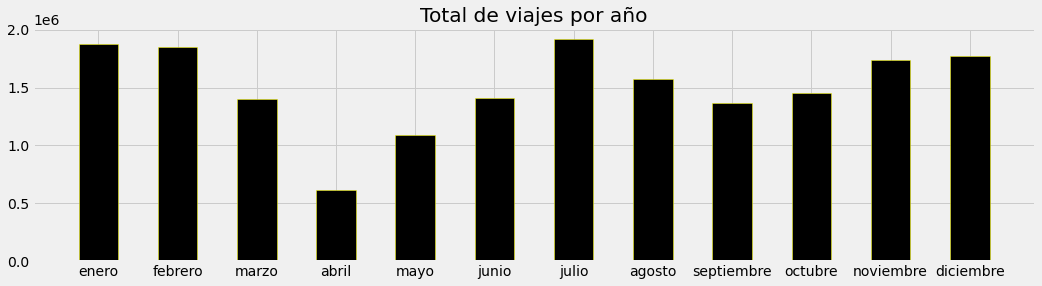

In [12]:
plt.subplots(figsize=(16,4))
plt.bar(viajes.mes[viajes.año==2020],viajes.Total_de_Viajes[viajes.año==2020], color="black", ec="yellow", width =0.5)
plt.title("Total de viajes por año")
plt.show()

In [13]:
habilitados = pd.read_csv("taxishabilitados_0.csv", sep=",")
habilitados

,RA,Subtipo,Titular,Genero,Dominio,Marca_Modelo,Modelo,Combustible
0,1,Ord.2649/80,"GAUNA, EMILIANO CEFERINO",M,MVX060,CHEVROLET CLASSIC,2013.0,GNC
1,2,Ord.2649/80,"FERRARO, RICARDO LUCIANO",M,OFZ069,CHEVROLET CLASSIC,2014.0,GNC
2,3,Ord.2649/80,"REMERSARO, RICARDO ALBERTO",M,PDQ740,CHEVROLET SPIN,2015.0,GNC
3,4,Ord.2649/80,"SANCHEZ, CLYDE CARMEN",F,NLE936,CHEVROLET COBALT,2014.0,GNC
4,5,Ord.2649/80,"MONGIARDO, JOSE",M,KHF458,RENAULT LOGAN,2011.0,GNC
...,...,...,...,...,...,...,...,...
3853,4081,Derecho de Explotación Ord.8099/06,"ALMIRON, MARIA LAURA",F,PGH039,FIAT SIENA,2015.0,GNC
3854,4082,Derecho de Explotación Ord.8997/12 Personas Fí...,"PAROLO, JORGE LUIS",M,PGD690,RENAULT LOGAN,2015.0,GNC
3855,4083,Derecho de Explotación Ord.8997/12 Personas Fí...,"PEDEMONTE, ADRIAN ALBERTO",M,PIM734,RENAULT NUEVO LOGAN,2015.0,NAFTA
3856,4084,Derecho de Explotación Ord.8997/12 Personas Fí...,"PEREZ DE LA CRUZ, WIESE EDGAR",M,PML951,TOYOTA ETIOS,2015.0,NAFTA


In [14]:
generoh = habilitados.groupby(habilitados.Genero).count()
generoh

,RA,Subtipo,Titular,Dominio,Marca_Modelo,Modelo,Combustible
Genero,,,,,,,
F,1153,1153,1153,1139,1153,1139,1139
M,2606,2606,2606,2587,2606,2587,2587
f,1,1,1,1,1,1,1


In [15]:
habilitados[habilitados.Genero=="f"]

,RA,Subtipo,Titular,Genero,Dominio,Marca_Modelo,Modelo,Combustible
1218,1245,Ord.2649/80,"SOLIS, GIMENA ANELEY",f,OTO256,FIAT SIENA,2015.0,GNC


In [16]:
habilitados.loc[habilitados.Genero =="f",'Genero']='F'

In [17]:
generoh = habilitados.groupby(habilitados.Genero).count()
generoh

,RA,Subtipo,Titular,Dominio,Marca_Modelo,Modelo,Combustible
Genero,,,,,,,
F,1154,1154,1154,1140,1154,1140,1140
M,2606,2606,2606,2587,2606,2587,2587


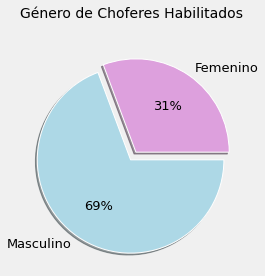

In [18]:
fig1, ax1 = plt.subplots(figsize=(4,4))
fig1.suptitle("Género de Choferes Habilitados", fontsize=14)
ax1.pie(generoh.RA, shadow=True, autopct="%1.0f%%", labels=["Femenino","Masculino"], colors=["plum","lightblue"],
        wedgeprops={"linewidth":1, "edgecolor":"white"},textprops={"fontsize":13}, explode=[0,0.1])
plt.show()

In [19]:
habilitados.Modelo

0       2013.0
1       2014.0
2       2015.0
3       2014.0
4       2011.0
         ...  
3853    2015.0
3854    2015.0
3855    2015.0
3856    2015.0
3857    2016.0
Name: Modelo, Length: 3858, dtype: float64

In [20]:
habilitados.Modelo.isnull().sum()

33

In [21]:
habilitados.Modelo = habilitados.Modelo.fillna(0)

In [22]:
habilitados.Modelo.unique()

array([2013., 2014., 2015., 2011., 2017., 2020., 2012., 2010., 2018.,
       2016., 2019., 2021., 2009.,    0., 2022., 2008.])

In [23]:
habilitados["Modelo"] = habilitados["Modelo"].astype("int64")   
habilitados.Modelo

0       2013
1       2014
2       2015
3       2014
4       2011
        ... 
3853    2015
3854    2015
3855    2015
3856    2015
3857    2016
Name: Modelo, Length: 3858, dtype: int64

In [24]:
conteo = habilitados.groupby(habilitados.Modelo).count()
conteo

,RA,Subtipo,Titular,Genero,Dominio,Marca_Modelo,Combustible
Modelo,,,,,,,
0,33,33,33,33,0,33,0
2008,1,1,1,1,1,1,1
2009,25,25,25,21,25,25,25
2010,67,67,67,62,67,67,67
2011,134,134,134,129,134,134,134
2012,278,278,278,277,278,278,278
2013,580,580,580,562,580,580,580
2014,453,453,453,443,453,453,453
2015,546,546,546,537,546,546,546


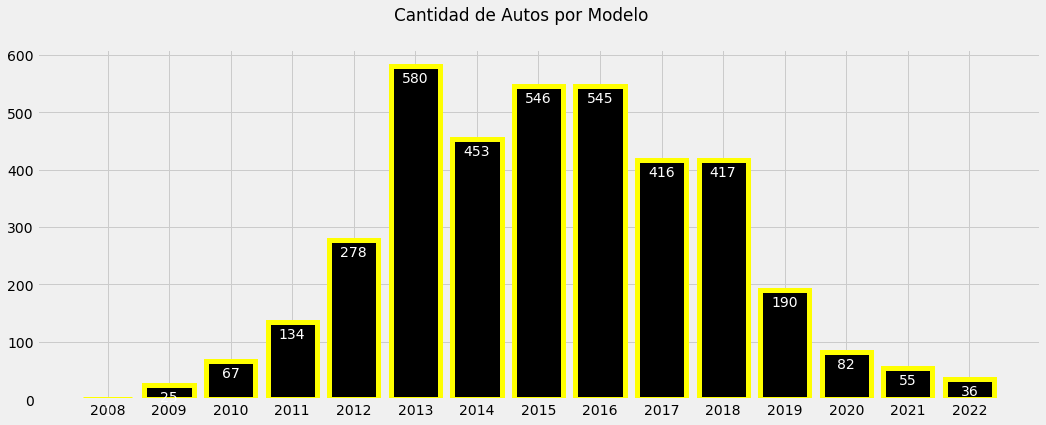

In [25]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle("Cantidad de Autos por Modelo")
barras = plt.bar(conteo.index[1:],conteo.RA[1:], color="black", ec="yellow", lw=5, tick_label=conteo.index[1:])

for barra in barras:
    height = barra.get_height()
    ax.annotate(height, xytext=(0,-5), color="white", xy=(barra.get_x()+barra.get_width()/2, height), textcoords="offset points", ha="center", va="top")

plt.show()

In [26]:
habilitados.Combustible.unique()

array(['GNC', 'NAFTA', 'Gas Oil', nan], dtype=object)

In [27]:
combustion = habilitados.groupby(habilitados.Combustible).count()
combustion

,RA,Subtipo,Titular,Genero,Dominio,Marca_Modelo,Modelo
Combustible,,,,,,,
GNC,3086,3086,3086,2999,3086,3086,3086
Gas Oil,23,23,23,23,23,23,23
NAFTA,716,716,716,705,716,716,716


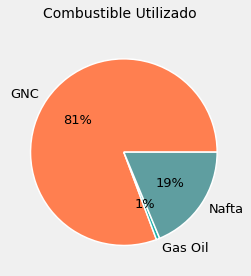

In [28]:
fig, ax = plt.subplots(figsize=(4,4))
fig.suptitle("Combustible Utilizado", fontsize=14)
ax.pie(combustion.RA, autopct="%1.0f%%", labels=["GNC","Gas Oil","Nafta"], colors=["coral","lightseagreen", "cadetblue"],
        wedgeprops={"linewidth":1.5, "edgecolor":"white"},textprops={"fontsize":13})
plt.show()

In [29]:
modelo = habilitados.groupby(habilitados.Marca_Modelo).count()
modelo

,RA,Subtipo,Titular,Genero,Dominio,Modelo,Combustible
Marca_Modelo,,,,,,,
,33,33,33,33,0,33,0
CHEVROLET AGILE,36,36,36,35,36,36,36
CHEVROLET AVEO,24,24,24,24,24,24,24
CHEVROLET CLASSIC,1040,1040,1040,1015,1040,1040,1040
CHEVROLET COBALT,90,90,90,71,90,90,90
CHEVROLET CORSA,42,42,42,36,42,42,42
CHEVROLET CORSA II,2,2,2,2,2,2,2
CHEVROLET MERIVA,13,13,13,13,13,13,13
CHEVROLET ONIX JOY,19,19,19,18,19,19,19


In [30]:
ordenado = modelo.sort_values(by="RA", ascending=False)
ord = ordenado.head(10)
ord

,RA,Subtipo,Titular,Genero,Dominio,Modelo,Combustible
Marca_Modelo,,,,,,,
CHEVROLET CLASSIC,1040,1040,1040,1015,1040,1040,1040
FIAT SIENA,817,817,817,814,817,817,817
CHEVROLET PRISMA,396,396,396,388,396,396,396
RENAULT LOGAN,326,326,326,315,326,326,326
VOLKSWAGEN VOYAGE,283,283,283,280,283,283,283
RENAULT NUEVO LOGAN,241,241,241,230,241,241,241
FIAT CRONOS,121,121,121,121,121,121,121
CHEVROLET COBALT,90,90,90,71,90,90,90
TOYOTA ETIOS,90,90,90,87,90,90,90


In [31]:
import squarify
import seaborn as sb

(0.0, 100.0, 0.0, 100.0)

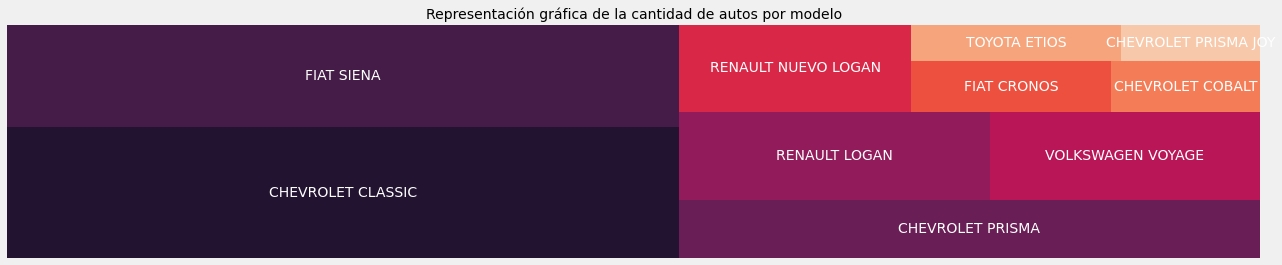

In [32]:
plt.figure(figsize=(20, 4))
squarify.plot(sizes = ord.RA, label=ord.index, color = sb.color_palette("rocket", len(ord.RA)),text_kwargs = {'fontsize': 14, 'color': 'white'},)
plt.title('Representación gráfica de la cantidad de autos por modelo', fontsize=14)
plt.axis("off")

###### __Período:__ Período informado
###### __KmOcupadosHora:__ Promedio de kilómetros recorridos por coche con la unidad ocupada durante una hora 
###### __KmLibresHora:__ Promedio de kilómetros recorridos por coche con la unidad libre durante una hora
###### __KmTotalesHora:__ Promedio de kilómetros totales recorridos por coche durante una hora
###### __ViajesHora:__ Promedio de viajes realizados por coche durante una hora

In [33]:
parametros = pd.read_csv("parametrosoperativos_0.csv", sep=";")
parametros

,Período,KmOcupadosHora,KmLibresHora,KmTotalesHora,ViajesHora
0,ene-16,"8,15","7,13","15,28","2,34"
1,feb-16,"8,57","6,57","15,13","2,43"
2,mar-16,"8,12","6,54","14,66","2,34"
3,abr-16,"8,21","6,22","14,43","2,36"
4,may-16,"7,14","6,47","13,61","2,2"
5,jun-16,"7,3","6,31","13,6","2,22"
6,jul-16,"7,31","6,29","13,6","2,21"
7,ago-16,"7,01","6,29","13,3","2,16"
8,sep-16,"6,62","6,07","12,69","2,07"
9,oct-16,"6,68","5,96","12,64","2,01"
